In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
#!type resale_Lincoln_MKS.csv

In [4]:
# load dataset
df_Tundra = pd.read_csv('resale_Toyota_Tundra.csv')
df_Tundra.head()

,brand,config,drivetrain,exterior_color,interior_color,mileage,model,price,transmission,year
0,Toyota,SR5,4x4/4-wheel drive,Black,Black,16093,Tundra,NaN,Automatic,2016
1,Toyota,SR5,4x2/2-wheel drive,Black,Gray,176606,Tundra,10995.0,Automatic,2007
2,Toyota,SR5,4x4/4-wheel drive,Gray,Black,38637,Tundra,31799.0,Automatic,2016
3,Toyota,SR5,RWD,Gray,Black,26184,Tundra,NaN,Automatic,2017
4,Toyota,Limited,4x4/4-wheel drive,Black,Other,41631,Tundra,30998.0,Automatic,2014


In [5]:
## clean the dataset
# drop rows that have NaN
df_Tundra = df_Tundra.dropna(axis=0, how='any')

config
SR5         2062
Limited      840
1794         522
Grade        273
Platinum     183
SR           151
Base         101
dtype: int64


Text(0.5, 1.0, 'Toyota Tundra-Configuration Plot')

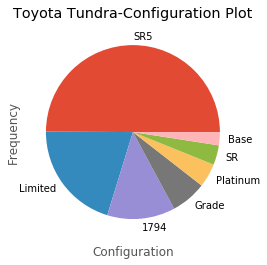

In [6]:
## Explore the dataset: Take care of the config: only care about Base and EcoBoost
df_Tundra = df_Tundra[df_Tundra['config'].isin(['SR5', 'Limited', '1794', 'Grade', 'Platinum', 'SR', 'Base']) ]
group_config = df_Tundra.groupby('config')
print(group_config.size().sort_values(ascending = False))
df_Tundra['config'].value_counts().plot(kind='pie')
plt.xlabel('Configuration')
plt.ylabel('Frequency')
plt.title('Toyota Tundra-Configuration Plot')

exterior_color
White     965
Gray      833
Black     728
Silver    626
Red       425
Blue      230
Brown     180
dtype: int64


Text(0.5, 1.0, 'Toyota Tundra-Exterior Color')

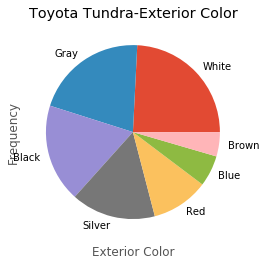

In [7]:
## Explore the dataset: Take care of the exterior_color: ['Black', 'White', 'Brown', 'Silver', 'Red', 'Gray', 'Beige', 'Other', 'Blue']
df_Tundra = df_Tundra[df_Tundra['exterior_color'].isin(['White', 'Gray', 'Black', 'Silver', 'Red', 'Blue', 'Brown'])]
group_ext_color = df_Tundra.groupby('exterior_color')
print(group_ext_color.size().sort_values(ascending = False))
df_Tundra['exterior_color'].value_counts().plot(kind='pie')
plt.xlabel('Exterior Color')
plt.ylabel('Frequency')
plt.title('Toyota Tundra-Exterior Color')

interior_color
Gray     1538
Black    1397
Other     432
Brown     404
Beige     205
dtype: int64


Text(0.5, 1.0, 'Toyota Tundra-Interior Color')

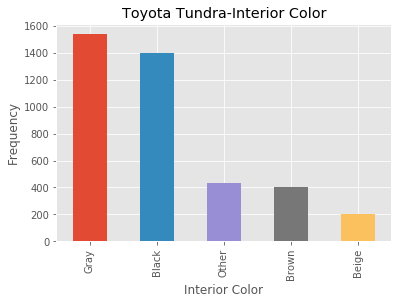

In [8]:
## Explore the dataset: Take care of the interior_color: []
df_Tundra = df_Tundra[df_Tundra['interior_color'].isin(['Black', 'Gray', 'Other', 'Beige', 'Brown'])]
group_int_color = df_Tundra.groupby('interior_color')
print(group_int_color.size().sort_values(ascending = False))
df_Tundra['interior_color'].value_counts().plot(kind='bar')
plt.xlabel('Interior Color')
plt.ylabel('Frequency')
plt.title('Toyota Tundra-Interior Color')

drivetrain
4x4/4-wheel drive    2594
RWD                  1346
dtype: int64


Text(0.5, 1.0, 'Toyota Tundra-Drivetrain')

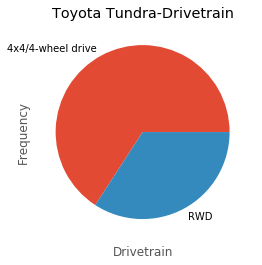

In [9]:
## Explore the dataset: Take care of the drivetrain:
df_Tundra = df_Tundra[df_Tundra['drivetrain'].isin(['4x4/4-wheel drive', 'RWD'])]
group_dt = df_Tundra.groupby('drivetrain')
print(group_dt.size().sort_values(ascending = False))
df_Tundra['drivetrain'].value_counts().plot(kind='pie')
plt.xlabel('Drivetrain')
plt.ylabel('Frequency')
plt.title('Toyota Tundra-Drivetrain')

year
2016    1019
2017     741
2018     622
2015     484
2014     346
2019     161
2012     145
2013     120
2011      82
2010      72
2007      51
2008      44
2006      17
2003      10
2005       8
2004       8
2009       6
2001       3
2000       1
dtype: int64


Text(0.5, 1.0, 'Toyota Tundra-Year')

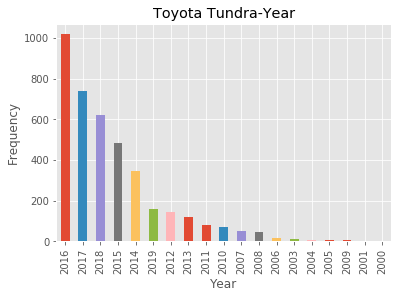

In [10]:
## Explore the dataset: Take care of the year:
group_yr = df_Tundra.groupby('year')
print(group_yr.size().sort_values(ascending = False))
df_Tundra['year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Toyota Tundra-Year')

Text(0.5, 1.0, 'Toyota Tundra-Price vs Mileage')

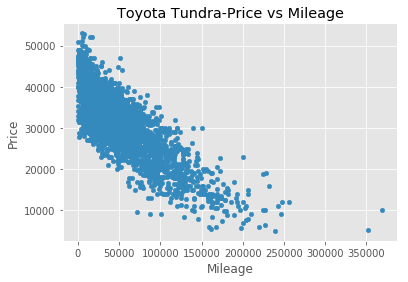

In [11]:
# scatter(x='Mileage', y='Price')
df_Tundra.plot(kind='scatter',x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Toyota Tundra-Price vs Mileage')

Text(0.5, 1.0, 'Toyota Tundra-Price vs Year')

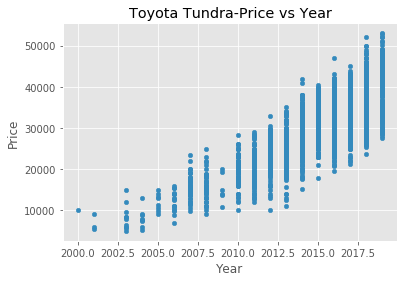

In [12]:
# scatter(x='Year', y='Price')
df_Tundra.plot(kind='scatter',x='year', y='price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Toyota Tundra-Price vs Year')

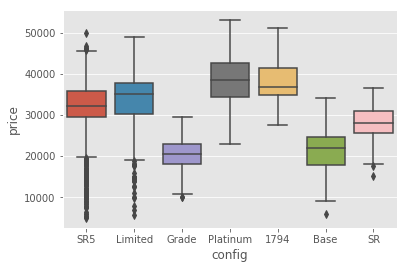

In [13]:
import seaborn as sns
# boxplot of price by config
sns.boxplot(x='config', y='price', data=df_Tundra)

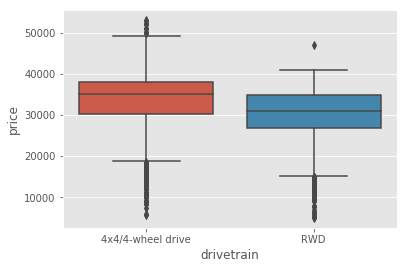

In [14]:
# boxplot of price by drivetrain
sns.boxplot(x='drivetrain', y='price', data=df_Tundra)

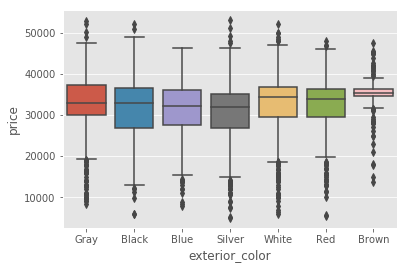

In [15]:
# boxplot of price by color
sns.boxplot(x='exterior_color', y='price', data=df_Tundra)

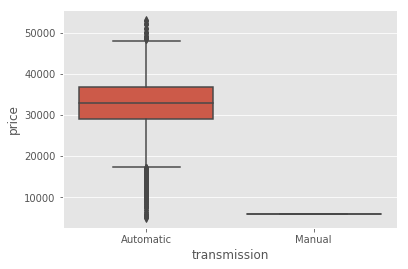

In [16]:
# boxplot of price by transmission
sns.boxplot(x='transmission', y='price', data=df_Tundra)

In [17]:
## Models 
# Linear Regression on Price vs Year
from sklearn.linear_model import LinearRegression
X = df_Tundra['year'].values.reshape(-1, 1)
y = df_Tundra['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_2019 = reg.predict(np.array([2019]).reshape(-1, 1))
price_2016 = reg.predict(np.array([2016]).reshape(-1, 1))
price_2014 = reg.predict(np.array([2014]).reshape(-1, 1))
print(price_2016/price_2019)
print(price_2014/price_2019)

[[2150.40408225]]
[-4301958.4828935]
[[0.83753107]]
[[0.72921845]]


In [18]:
# Linear Regression on Price vs Mileage
from sklearn.linear_model import LinearRegression
X = df_Tundra['mileage'].values.reshape(-1, 1)
y = df_Tundra['price'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
price_0 = reg.predict(np.array([0]).reshape(-1, 1))
price_45k = reg.predict(np.array([45000]).reshape(-1, 1))
price_75k = reg.predict(np.array([75000]).reshape(-1, 1))
print(price_45k/price_0)
print(price_75k/price_0)

[[-0.1510295]]
[39383.1527047]
[[0.82743058]]
[[0.7123843]]


In [19]:
# Multiple linear regression